In [45]:
import numpy as np
import matplotlib.pyplot as plt

['2.310116E+57', '1.680297E+57', '1.793706E+57', '3.514020E+52', '3.037534E+52', '3.448685E+52']
2.310115610892185e+57


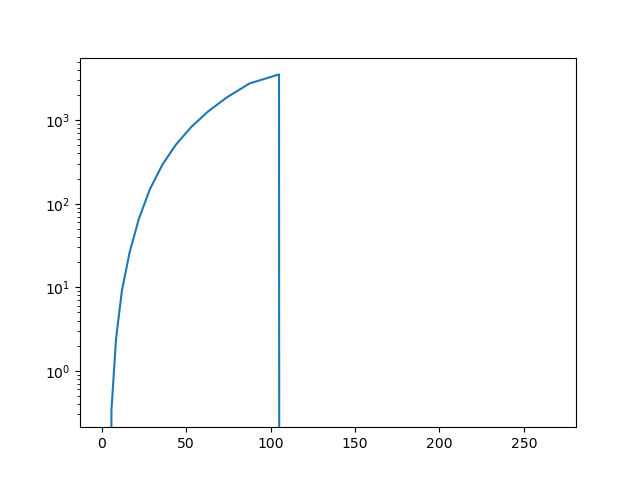

[0.00000000e+00 0.00000000e+00 0.00000000e+00 3.35683104e-01
 2.42053269e+00 9.21618755e+00 2.60895326e+01 6.58113679e+01
 1.48767493e+02 2.95450415e+02 5.12048842e+02 8.29604864e+02
 1.27388183e+03 1.87054862e+03 2.75496907e+03 3.53823441e+03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


In [159]:
%matplotlib widget
# Read nakazato_13Ms_200ms_Z002.dat, reading the first row separately
with open('nakazato_13Ms_200ms_Z002.dat', 'r') as file:
    first_row = file.readline().split()
    print(first_row)

    # Get the rest of the file split into columns
    rest_of_file = [line.split() for line in file]
    # Remove empty lines
    rest_of_file = np.array([line for line in rest_of_file if line], dtype=float)
    #print(rest_of_file)

# Fist two cols are left and right bins. For our usual bin convention:
bins = np.append(rest_of_file[:, 0], rest_of_file[-1, 1])
bin_centers = (bins[:-1] + bins[1:]) / 2
bin_widths = bins[1:] - bins[:-1]
n_nu_e = rest_of_file[:, 2]
# print(n_nu_e)
# print(bins)

# This is not a typo, it's specified like this in the guide
total_number_of_nu_e = np.sum(n_nu_e * bin_widths)
print(total_number_of_nu_e)

# Read the cross section file
xsec_sg_path = "../snowglobes/xscns/"
sg = np.genfromtxt(xsec_sg_path + "xs_nue_Ar40_marley.dat", skip_footer=0)

log_e_sg, xsec_sg = sg[:, 0], sg[:, 1]
e_sg = 10**log_e_sg
xsec_sg *= e_sg * 1e4 # 1e-38 to 1e-42
e_sg *= 1000


# Get the average cross section in each bin
xsec_sg_binned = []
for i, bin_center in enumerate(bin_centers):
    e_left = bins[i]
    e_right = bins[i+1]
    xsecs_in_bin = xsec_sg[(e_sg > e_left) & (e_sg <= e_right)]
    if len(xsecs_in_bin) > 0:
        xsec_sg_binned.append(np.sum(xsecs_in_bin) / len(xsecs_in_bin))
    else:
        #pass
        xsec_sg_binned.append(0)
xsec_sg_binned = np.array(xsec_sg_binned)

# Plot the cross section
# plt.figure()
# plt.plot(e_sg, xsec_sg)
# plt.xlabel('Energy (MeV)')
# plt.ylabel('Cross section')
# plt.yscale('log')
# plt.xlim(0, 60)
# # add grid
# plt.grid(True)
# plt.show()

# Plot the binned cross section
# plt.figure()
# plt.plot(bin_centers[:], xsec_sg_binned[:])
# plt.yscale('log')
# plt.show()
# print(xsec_sg_binned)

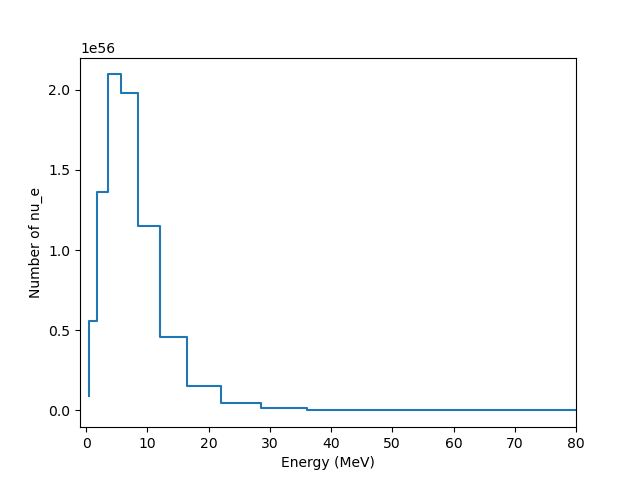

Number of Ar40 targets: 6.028169172786674e+32
Total number of interactions: 1504.0024899806463


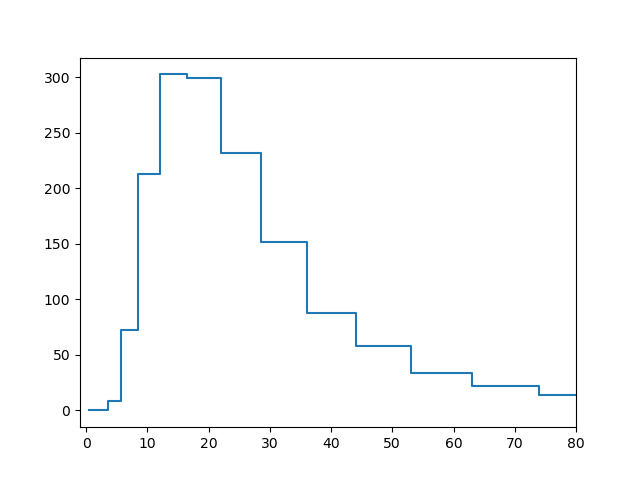

In [176]:
# Plot the bin centers vs the number of nu_e as a step plot
plt.figure()
plt.step(bin_centers, n_nu_e)
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of nu_e')
plt.xlim(-1, 80)
#plt.yscale('log')
plt.show()

# The total cross section of the detector is the sum of the xsec of all individual argon nuclei
detector_mass = 40 # ktons
ar40_mass = 39.96 # atomic mass units
amu_to_kg = 1.660539e-27 # kg/amu
ar40_targets = detector_mass * 1e6 / (ar40_mass * amu_to_kg)
print(f"Number of Ar40 targets: {ar40_targets}")

# The neutrino fluence (per bin) is the number of nu_e divided by the area of the sphere with r = distance_to_source
distance_to_source = 10 # kpc
pc_to_cm = 3.086e+18 # cm/pc
fluence = n_nu_e * bin_widths / (4 * np.pi * (distance_to_source * 1e3 * pc_to_cm)**2) * 1e-42 # 1e-42 to match the units of xsec_sg_binned

# Then, the number of interactions is the product of the fluence, the cross section, and the number of targets
n_interactions = fluence * xsec_sg_binned * ar40_targets
total_interactions = np.sum(n_interactions)
print(f"Total number of interactions: {total_interactions}")

plt.figure()
plt.step(bin_centers, n_interactions)
plt.xlim(-1, 80)
plt.show()
